# Plan_Dieases Prediction project
 in this project we will build a model which can predict what state of a plan. it will predict if a plan is doing well or have some dieases



In [ ]:
#  load the drive helper and mont
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imread
import cv2
import random
import os
from  os import listdir
from  PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import  Adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


# Now let's visualisate our data

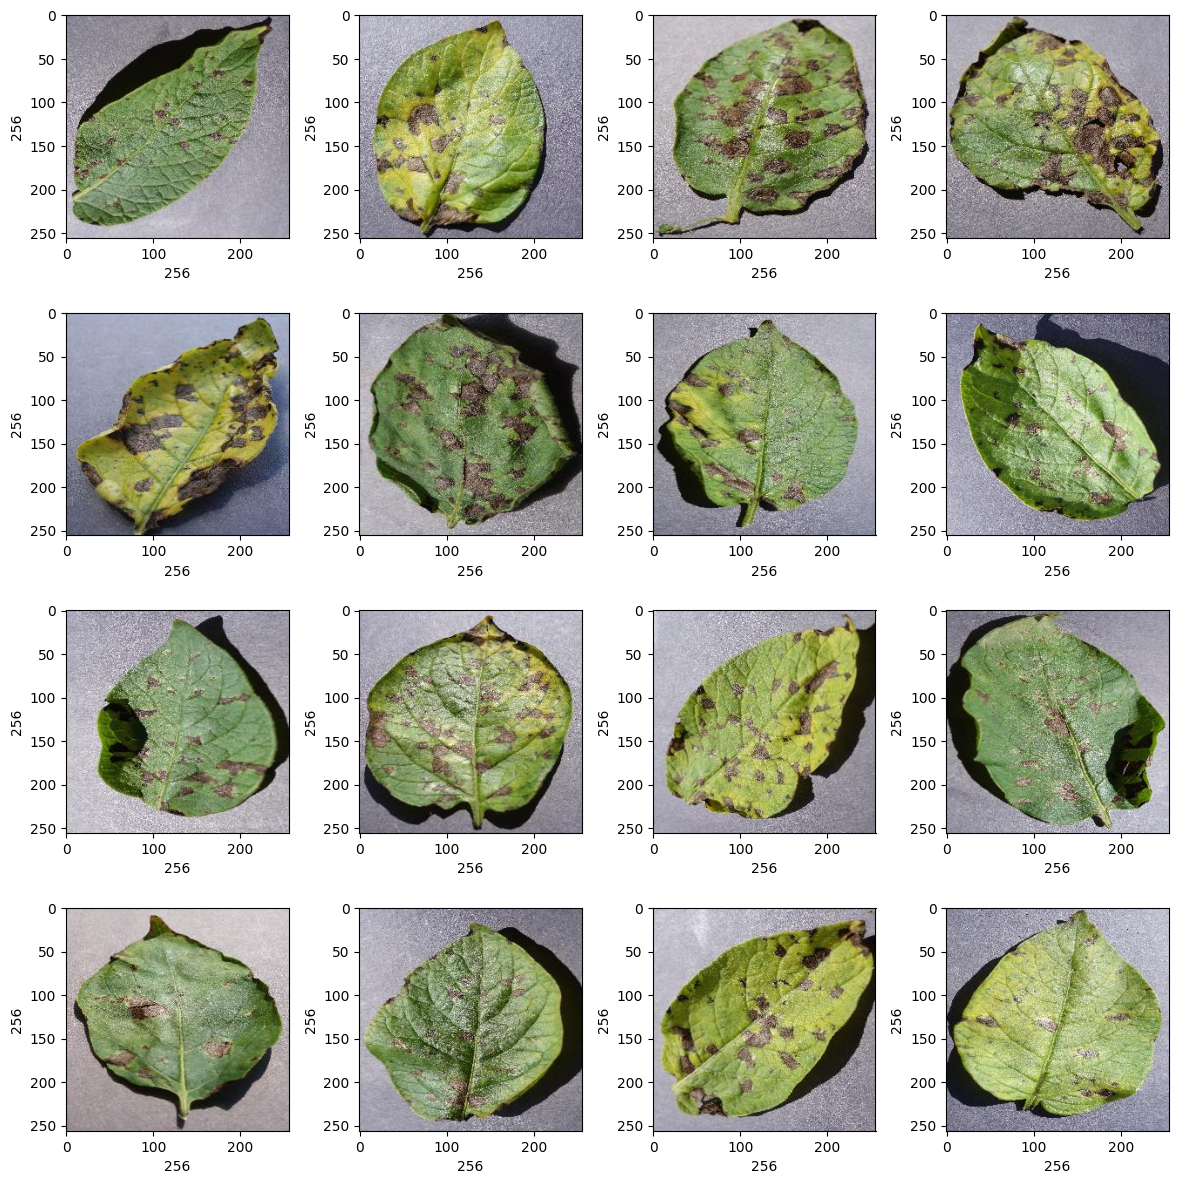

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(12, 12))
path = "/content/drive/MyDrive/Plant_deasease_project/Patato_Early_blight"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = mpimg.imread(path +'/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)



In [ ]:
from sklearn.preprocessing import LabelEncoder
dir = "/content/drive/MyDrive/Plant_deasease_project"
image_list = []
label_list = []
class_names = os.listdir(dir)


In [ ]:
class_names

['corn_(maize)_common_rust_',
 '.ipynb_checkpoints',
 'Patato_Early_blight',
 'Tomato_bacterial_spot',
 'models']

In [ ]:
class_names = [
    d for d in os.listdir(dir)
    if os.path.isdir(os.path.join(dir, d)) and not d.startswith('.')

]
print(class_names)


['corn_(maize)_common_rust_', 'Patato_Early_blight', 'Tomato_bacterial_spot', 'models']


In [ ]:
# loop throup the image and save the image   in  image_list and label in labels_list
for class_name in class_names:
  path = os.path.join(dir, class_name)
  for file in os.listdir(path):
    image_path = os.path.join(path, file)
    image = cv2.imread(image_path)
    if image is None:
      continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, (256, 256))
    image =  img_to_array(image).astype('float32')
    image = image / 255.0

    image_list.append(image)
    label_list.append(class_name)


In [ ]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(label_list)
#labels_encoded

In [ ]:
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(class_mapping)

{np.str_('Patato_Early_blight'): np.int64(0), np.str_('Tomato_bacterial_spot'): np.int64(1), np.str_('corn_(maize)_common_rust_'): np.int64(2)}


In [ ]:
X = np.array(image_list)
Y = np.array(labels_encoded)

In [ ]:
label_counts = pd.Series(label_list).value_counts()
print(label_counts)

corn_(maize)_common_rust_    300
Patato_Early_blight          300
Tomato_bacterial_spot        300
Name: count, dtype: int64


In [ ]:
# split the data into train and text
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=Y)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Now let's find the model achitecture we want to use

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding ="same", input_shape=(256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3),padding ="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding ="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 42, 42, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,915 (7.11 MB)

 Trainable params: 1,862,915 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# splling the data into train and valid
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Now train the model
from keras.callbacks import ModelCheckpoint
checkpoint_path = "/content/drive/MyDrive/Plant_deasease_project/models.keras"
checkpoint_cb = ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
)
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_cb],
)
model.save(checkpoint_path)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.5664 - loss: 0.9100 - val_accuracy: 0.9583 - val_loss: 0.1360
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9377 - loss: 0.1745 - val_accuracy: 0.9722 - val_loss: 0.0764
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9738 - loss: 0.0636 - val_accuracy: 0.9653 - val_loss: 0.0822
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9745 - loss: 0.0892 - val_accuracy: 0.9653 - val_loss: 0.1134
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9874 - loss: 0.0390 - val_accuracy: 0.9792 - val_loss: 0.0578
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9900 - loss: 0.0220 - val_accuracy: 0.9861 - val_loss: 0.0525
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9976 - loss: 0.0053 - val_accuracy: 0.9722 - val_loss: 0.1127
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9826 - loss: 0.0471 - val_accuracy: 0.9653 -

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_path = "/content/drive/MyDrive/Plant_deasease_project/models.keras"
checkpoint_cb = ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
)


early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

Model_2 = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[checkpoint_cb, early_stop]
)



model.save(checkpoint_path)
print("Model saved at: ", checkpoint_path)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.9889 - val_loss: 0.0855
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9909 - loss: 0.0136 - val_accuracy: 0.9889 - val_loss: 0.0287
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9979 - loss: 0.0051 - val_accuracy: 0.9944 - val_loss: 0.0388
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9944 - val_loss: 0.0439
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9944 - val_loss: 0.0448
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9944 - val_loss: 0.0491
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9994 - loss: 0.0010 - val_accuracy: 0.9944 - 

In [ ]:
#  Do the prediction
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9888888888888889


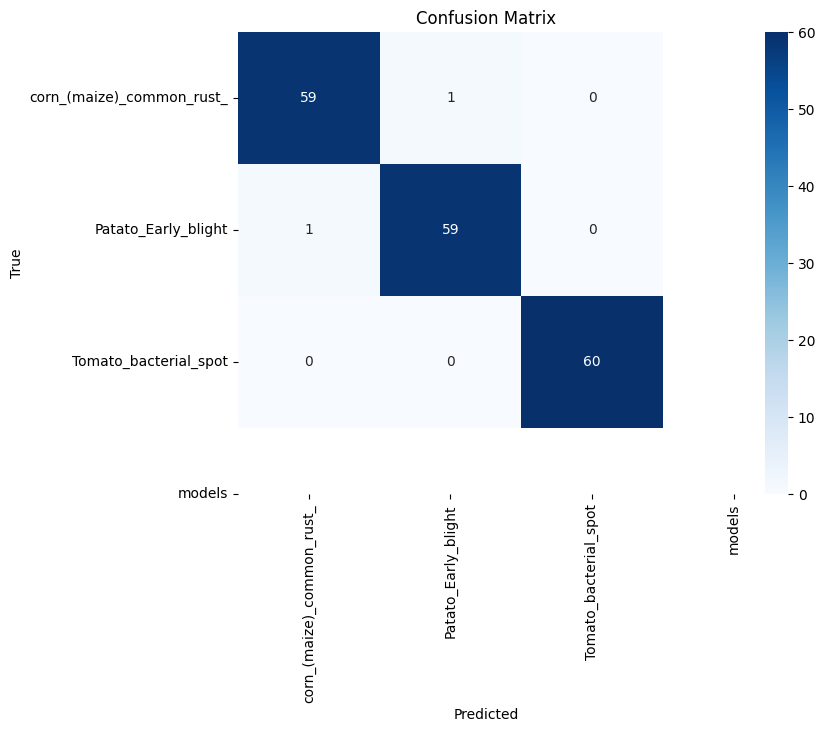

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_names = encoder.classes_
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

                           precision    recall  f1-score   support

      Patato_Early_blight       0.98      0.98      0.98        60
    Tomato_bacterial_spot       0.98      0.98      0.98        60
corn_(maize)_common_rust_       1.00      1.00      1.00        60

                 accuracy                           0.99       180
                macro avg       0.99      0.99      0.99       180
             weighted avg       0.99      0.99      0.99       180



In [ ]:
y_true = np.argmax(y_test, axis=1)
class_names = encoder.classes_

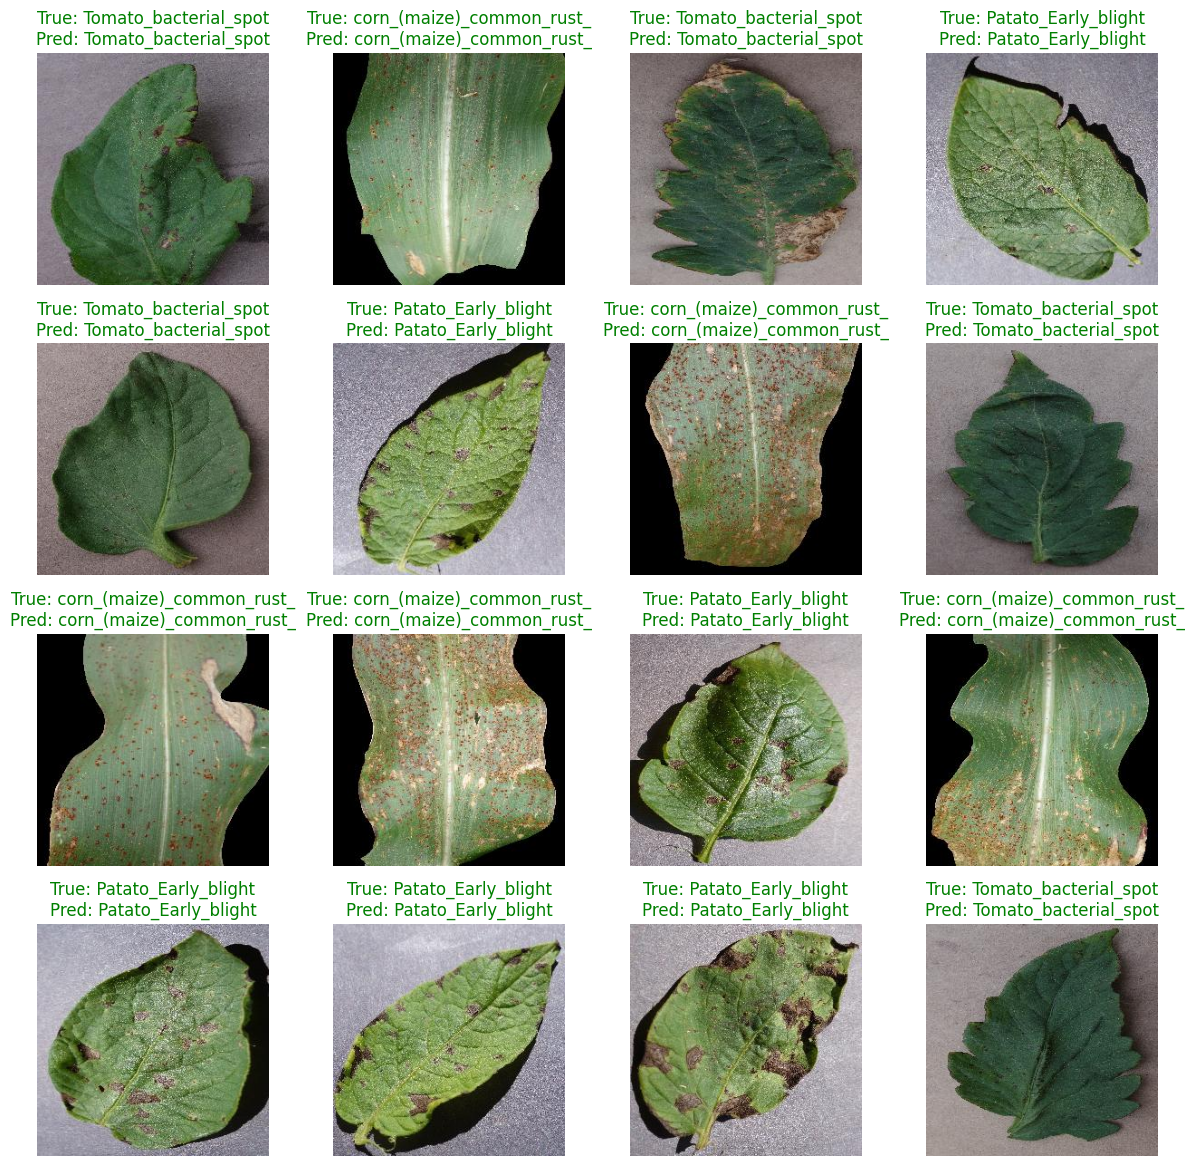

In [ ]:
plt.figure(figsize=(12, 12))
indice = random.sample(range(len(X_test)), 16)
for i, idx in enumerate(indice):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    plt.imshow(X_test[idx])
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    color = "green" if y_true[idx] == y_pred[idx] else "red"
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.show()

### Conlusion
The model achieves high accuracy on the PlantVillage dataset. However, performance
on real-word field images may vary due to lighting conditions, background noise, and camera variability

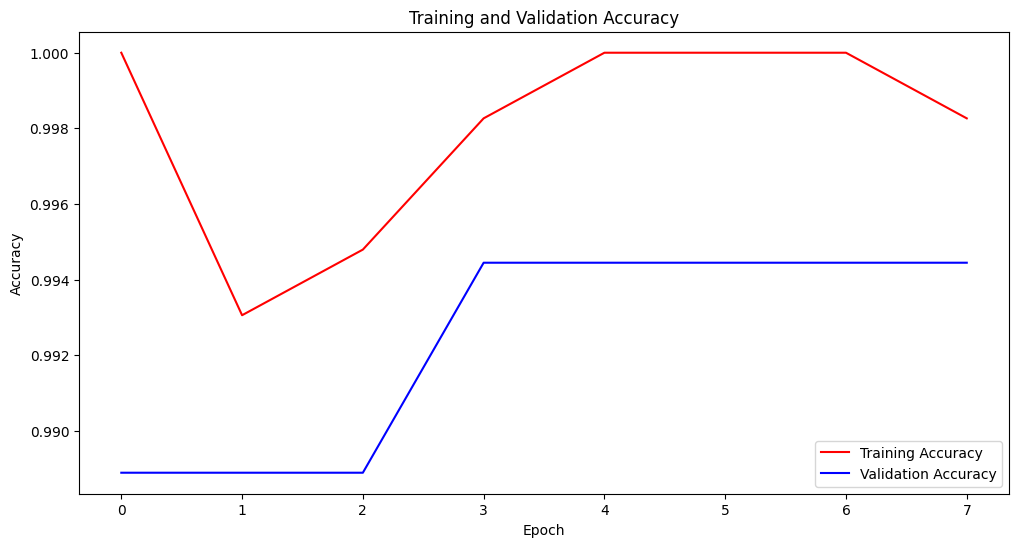

In [ ]:
# plot the training history
plt.figure(figsize=(12, 6))
plt.plot(Model_2.history['accuracy'], label='Training Accuracy', color = 'r')
plt.plot(Model_2.history['val_accuracy'], label='Validation Accuracy', color = 'b')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Conclusion
This project build a model that detect plantes dieases using pictures